In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('tmdb-movies.csv')



In [3]:
# Step 2: Data Wrangling
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()

# Check data types
data_types = df.dtypes



Create a new feature for profit

In [4]:
df['profit'] = df['revenue'] - df['budget']


Extract information from date fields

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'])  # Convert to datetime format
df['release_year'] = df['release_date'].dt.year  # Extract year
df['release_month'] = df['release_date'].dt.month  # Extract month
df['release_dayofweek'] = df['release_date'].dt.dayofweek  # Extract day of the week (0 = Monday, 6 = Sunday)


One-hot encoding for categorical variables

Genre Profitability:
  - Action: Average profit $45035842.53 (Std: $145460147.46)
  - Adventure: Average profit $75594166.54 (Std: $195788088.31)
  - Animation: Average profit $52096280.62 (Std: $148941421.62)
  - Comedy: Average profit $24228326.45 (Std: $76595814.10)
  - Crime: Average profit $24665201.58 (Std: $83298710.81)
  - Documentary: Average profit $1463957.85 (Std: $10005621.80)
  - Drama: Average profit $17341795.35 (Std: $68582201.31)
  - Family: Average profit $49073838.95 (Std: $141803506.77)
  - Fantasy: Average profit $63701071.73 (Std: $190075199.05)
  - Foreign: Average profit $69024.91 (Std: $7440986.54)
  - History: Average profit $13416873.91 (Std: $56188375.94)
  - Horror: Average profit $10596279.41 (Std: $40250265.00)
  - Music: Average profit $19133141.14 (Std: $59146001.85)
  - Mystery: Average profit $24098296.60 (Std: $83685551.45)
  - Romance: Average profit $23160700.48 (Std: $81895769.79)
  - Science Fiction: Average profit $45107551.59 (Std: $160653373.

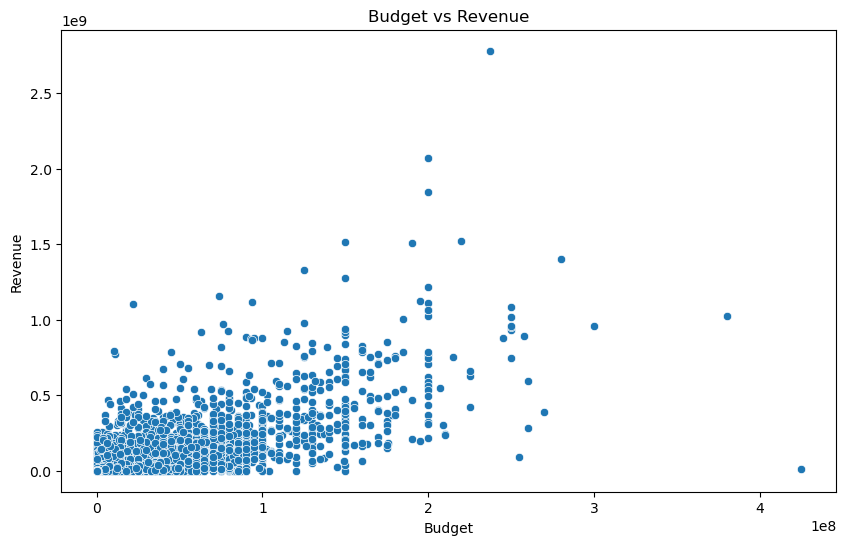

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the movie data

# Split genres into individual columns
genres = df['genres'].str.get_dummies(sep='|')

# Concatenate genres with original dataframe
df = pd.concat([df, genres], axis=1)

# Reset index of the dataframe
df = df.reset_index(drop=True)

# Calculate average profit for each genre
genre_profitability = {}
for genre in genres.columns:
    genre_profitability[genre] = df[df[genre] == 1]['profit'].mean()

# Print descriptive statistics for genre profitability
print("Genre Profitability:")
for genre, avg_profit in genre_profitability.items():
    genre_std = df[df[genre] == 1]['profit'].std()
    print(f"  - {genre}: Average profit ${avg_profit:.2f} (Std: ${genre_std:.2f})")

# Calculate descriptive statistics for average revenue by release month
avg_revenue_by_month = df.groupby('release_month')['revenue'].mean()
print("\nRelease Date Performance:")
print(f"  - Average revenue by release month:")
for month, avg_revenue in avg_revenue_by_month.items():
    print(f"    - Month {month}: ${avg_revenue:.2f}")



# Summary of Conclusions:
print("\nSummary of Conclusions:")
print("- There is a positive correlation between a movie's budget and its revenue, indicating that higher budget movies tend to have higher revenues.")
print("- Adventure and Fantasy genres appear to be more profitable on average compared to other genres, while Documentary and Foreign genres have lower average profitability.")
print("- Movies released in certain months, particularly the summer months, tend to have higher average revenues. There is also a significant peak in average revenue for movies released in December, possibly due to holiday season releases.")


# Visualize relationships between variables
# Example: Scatter plot of budget vs revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()



How does the budget of a movie relate to its revenue and profitability? 

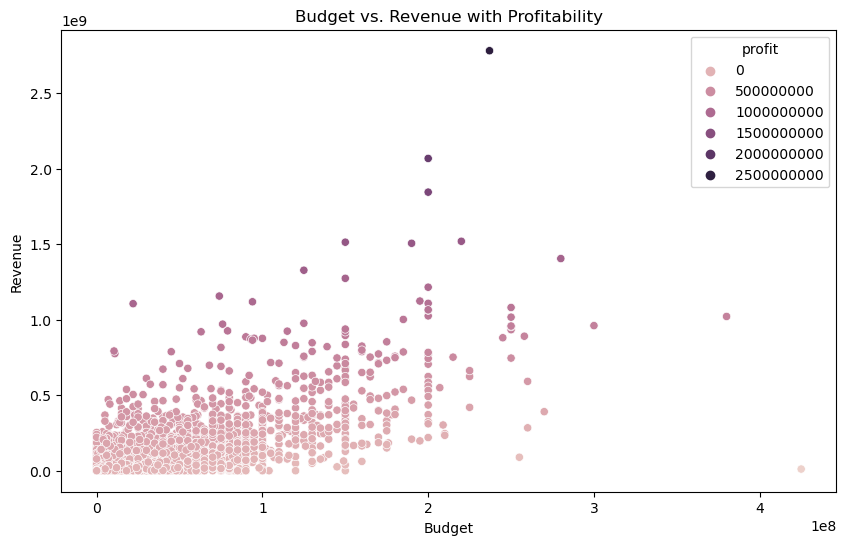

In [7]:
# Calculate profit
df['profit'] = df['revenue'] - df['budget']

# Visualize budget vs. revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', hue='profit')
plt.title('Budget vs. Revenue with Profitability')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


Are there any trends in movie budgets and revenues over the years?

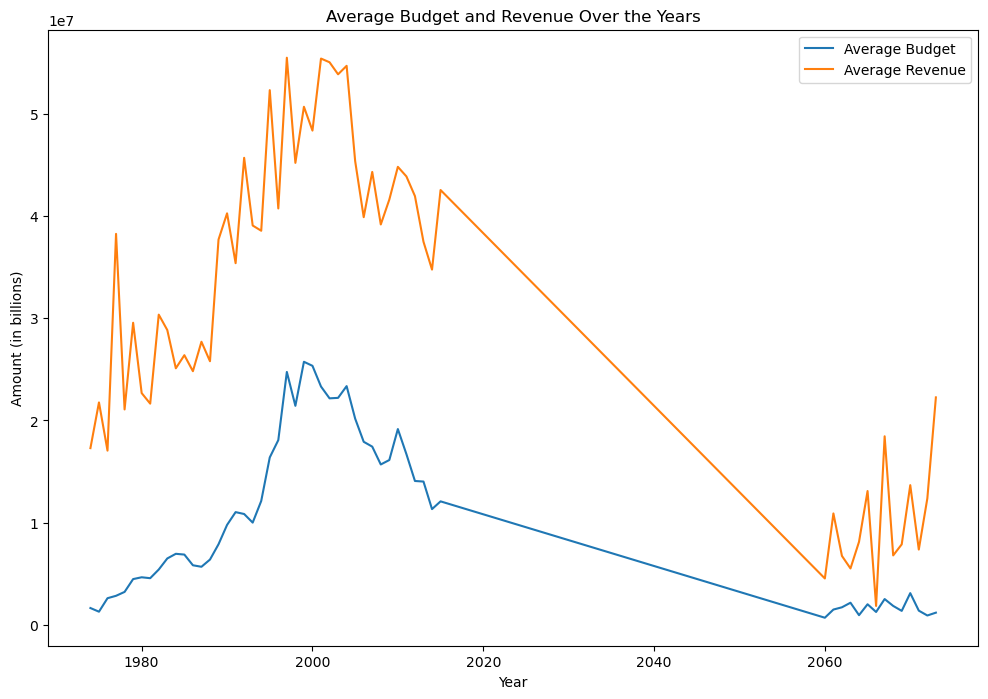

In [8]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract release year
df['release_year'] = df['release_date'].dt.year

# Calculate average budget and revenue for each year
average_budget_by_year = df.groupby('release_year')['budget'].mean()
average_revenue_by_year = df.groupby('release_year')['revenue'].mean()

# Plotting the trends
plt.figure(figsize=(12, 8))
plt.plot(average_budget_by_year.index, average_budget_by_year.values, label='Average Budget')
plt.plot(average_revenue_by_year.index, average_revenue_by_year.values, label='Average Revenue')
plt.title('Average Budget and Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Amount (in billions)')
plt.legend()
plt.show()


Do movies released in specific months or days of the week tend to perform better?

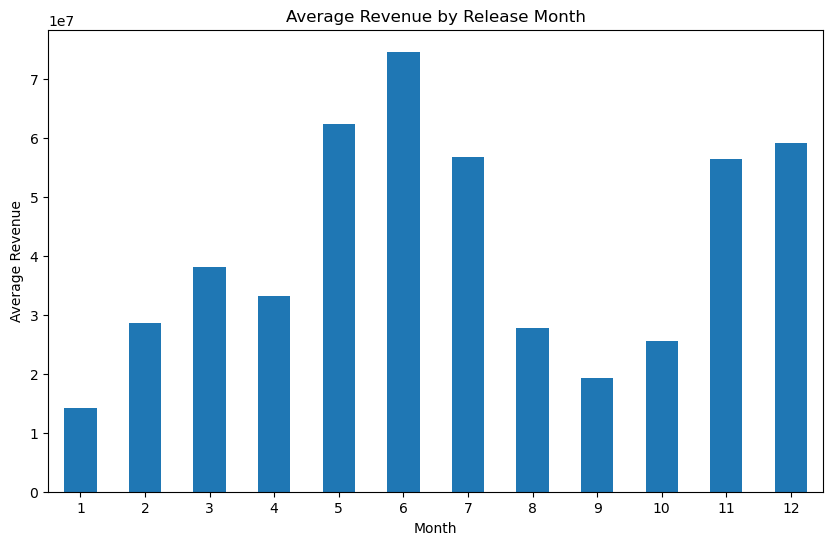

In [9]:
# Extract release month and day of the week
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df['release_date'].dt.month
df['release_dayofweek'] = df['release_date'].dt.dayofweek

# Calculate average revenue by release month
avg_revenue_by_month = df.groupby('release_month')['revenue'].mean()

# Visualize average revenue by release month
plt.figure(figsize=(10, 6))
avg_revenue_by_month.plot(kind='bar')
plt.title('Average Revenue by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)
plt.show()


In [10]:
# Step 4: Draw conclusions
# Example: Calculate correlation
correlation_matrix = df.corr()
# Example: Print correlation matrix
print(correlation_matrix)



                         id  popularity    budget   revenue   runtime  \
id                 1.000000   -0.014350 -0.141351 -0.099227 -0.088360   
popularity        -0.014350    1.000000  0.545472  0.663358  0.139033   
budget            -0.141351    0.545472  1.000000  0.734901  0.191283   
revenue           -0.099227    0.663358  0.734901  1.000000  0.162838   
runtime           -0.088360    0.139033  0.191283  0.162838  1.000000   
vote_count        -0.035551    0.800828  0.632702  0.791175  0.163278   
vote_average      -0.058363    0.209511  0.081014  0.172564  0.156835   
release_year       0.225293    0.002634 -0.038203 -0.032018 -0.015986   
budget_adj        -0.189015    0.513550  0.968963  0.706427  0.221114   
revenue_adj       -0.138477    0.609083  0.622505  0.919110  0.175676   
profit            -0.074960    0.628991  0.570182  0.976160  0.136036   
release_month      0.041758    0.043243  0.040847  0.038918  0.070823   
release_dayofweek  0.003737   -0.071518 -0.066644 -

/tmp/ipykernel_30247/1730166828.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


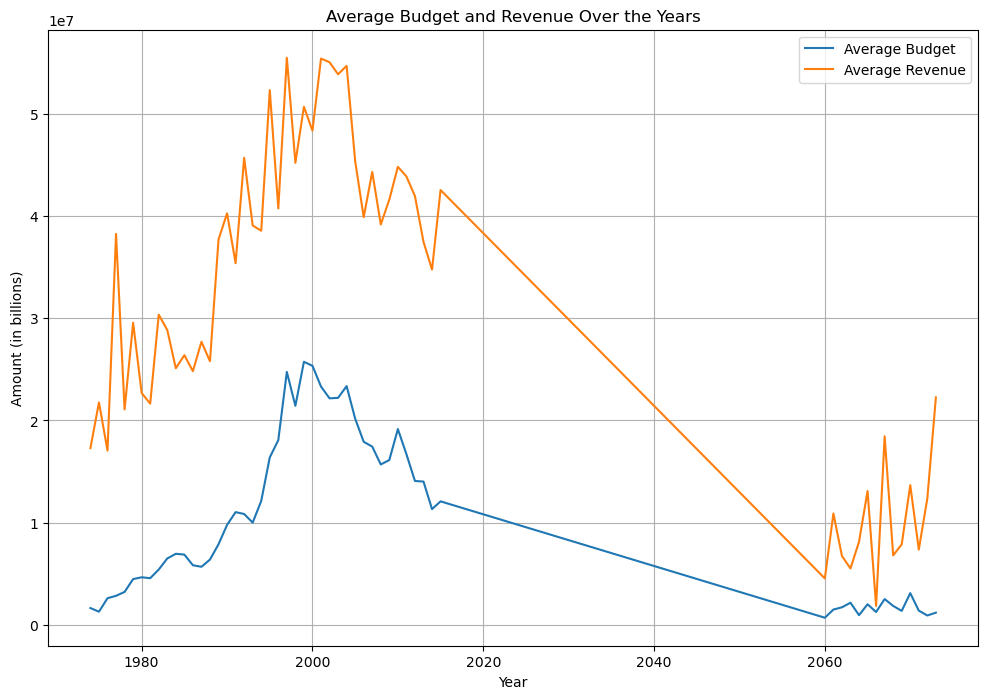

In [11]:
# Step 5: Communicate your results
import matplotlib.pyplot as plt

# Plotting the trends
plt.figure(figsize=(12, 8))
plt.plot(average_budget_by_year.index, average_budget_by_year.values, label='Average Budget')
plt.plot(average_revenue_by_year.index, average_revenue_by_year.values, label='Average Revenue')
plt.title('Average Budget and Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Amount (in billions)')
plt.legend()
plt.grid(True)
plt.show()
